In [1]:
import pandas as pd
df = pd.read_csv('/root/autodl-tmp/xingmei/RecSys23/data/simplified_trn_val_tst_with_weekday.csv', sep='\t')

## Cat

In [2]:
cat = [f'f_{i}' for i in range(2, 33)] + ['f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 
                                          'f_50', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 
                                          'f_60', 'f_61', 'f_62', 'f_63',
                                          ] + [f'f_{i}' for i in range(71, 80)] 


cat.remove('f_7')
cat.remove('f_27')
cat.remove('f_28')
cat.remove('f_29')

In [3]:
trn_df = df[:3387880].copy()
val_df = df[3387880:-160973].copy()
tst_df = df[-160973:].copy()

In [4]:
for i in cat:
    trn_mode = trn_df[i].mode()
    trn_cat = trn_df[i].unique()
    val_df[i] = val_df[i].map(lambda x: x if x in trn_cat else trn_mode)
    tst_df[i] = tst_df[i].map(lambda x: x if x in trn_cat else trn_mode)

## Float

In [5]:
flo = [f'f_{i}' for i in range(42, 80)]
for i in cat:
    if i in flo:
        flo.remove(i)

In [7]:
df[:3387880] = trn_df
df[3387880:-160973] = val_df
df[-160973:] = tst_df

for i in flo:
    df[i].fillna(value=df[i].mean(), inplace=True)

In [8]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

df_ = df.copy()
skewed = df_[flo].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed[abs(skewed) > 0.5]
skewed_features = high_skew.index

for feat in skewed_features:
    df_[feat] = boxcox1p(df_[feat], boxcox_normmax(df_[feat] + 1))

In [9]:
from scipy import stats
for i in flo:
    print(i, stats.shapiro(df_[i]), stats.kstest(df_[i], 'norm', (df[i].mean(), df_[i].std())), stats.normaltest(df_[i]))

/root/autodl-tmp/xingmei/.conda/envs/recstudio/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


f_42 ShapiroResult(statistic=0.9743392467498779, pvalue=0.0) KstestResult(statistic=0.9999816240708757, pvalue=0.0, statistic_location=11.202699857667211, statistic_sign=1) NormaltestResult(statistic=83833.52711791254, pvalue=0.0)
f_43 ShapiroResult(statistic=0.9271695017814636, pvalue=0.0) KstestResult(statistic=0.21337059232807964, pvalue=0.0, statistic_location=0.0020703642537917427, statistic_sign=1) NormaltestResult(statistic=549590.5593538691, pvalue=0.0)
f_51 ShapiroResult(statistic=0.9672620296478271, pvalue=0.0) KstestResult(statistic=0.9960546811078399, pvalue=0.0, statistic_location=5.584844997347279, statistic_sign=1) NormaltestResult(statistic=885686.1063732948, pvalue=0.0)
f_58 ShapiroResult(statistic=0.9521435499191284, pvalue=0.0) KstestResult(statistic=0.9850007705980982, pvalue=0.0, statistic_location=1.0999610379014642, statistic_sign=1) NormaltestResult(statistic=312657.0432805851, pvalue=0.0)
f_59 ShapiroResult(statistic=0.960040807723999, pvalue=0.0) KstestResult(

f_42


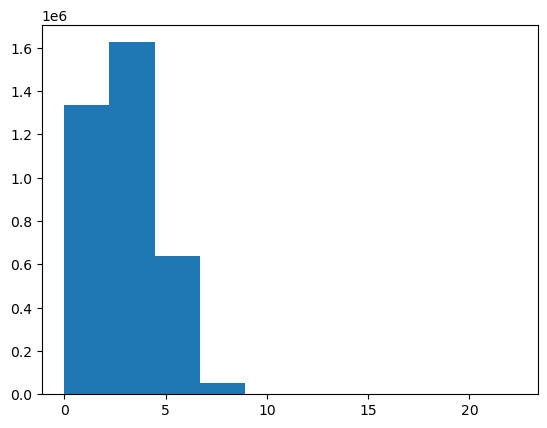

f_43


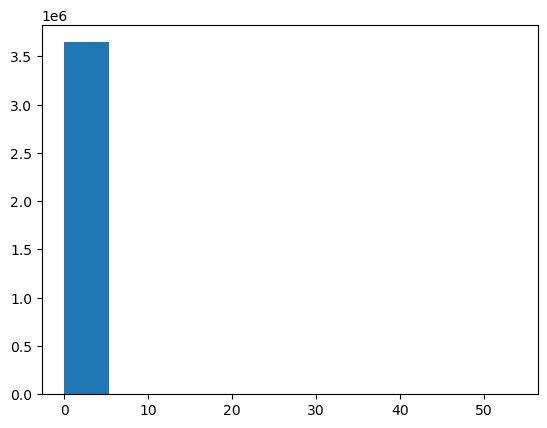

f_51


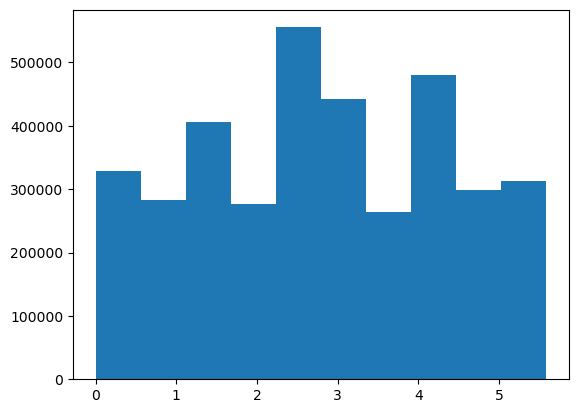

f_58


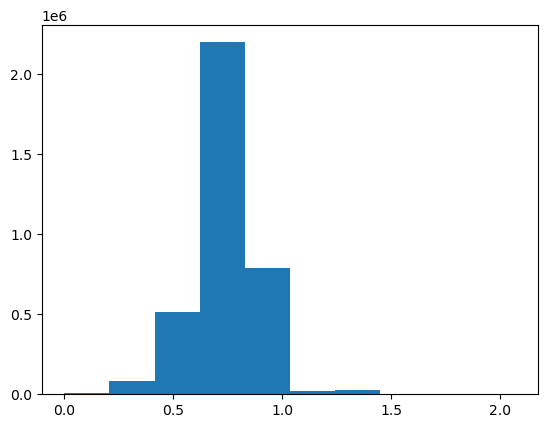

f_59


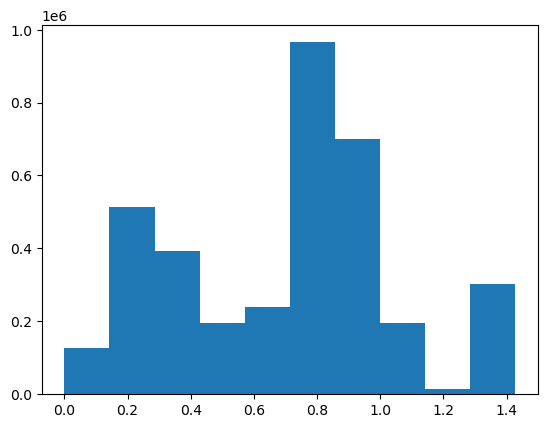

f_64


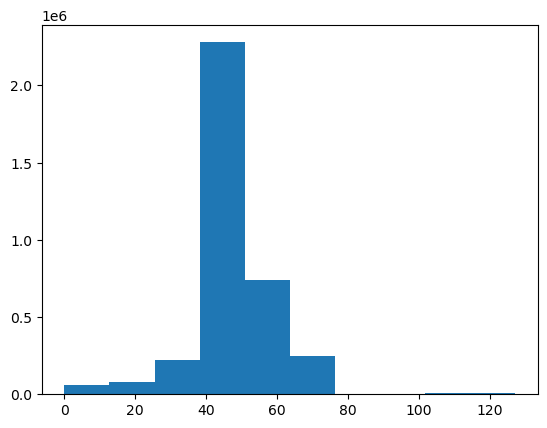

f_65


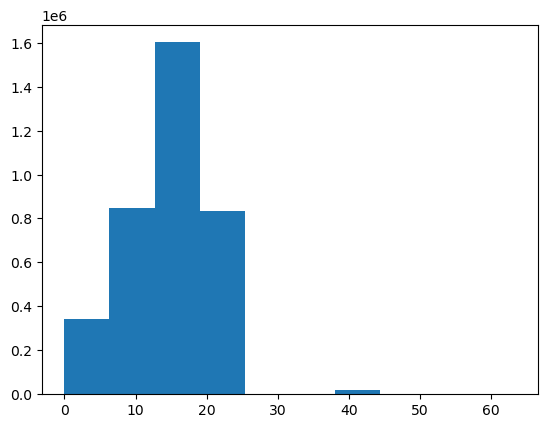

f_66


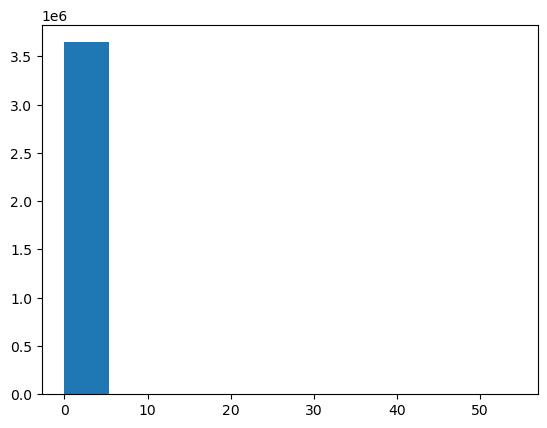

f_67


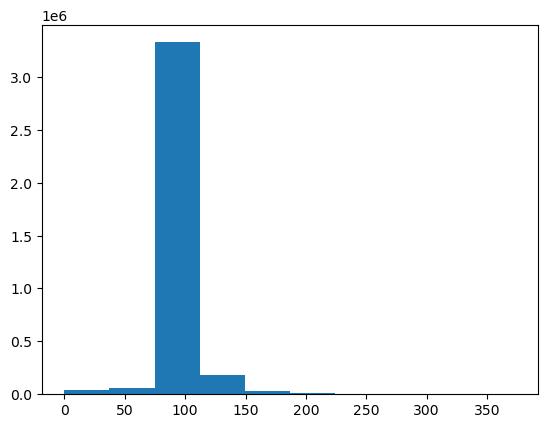

f_68


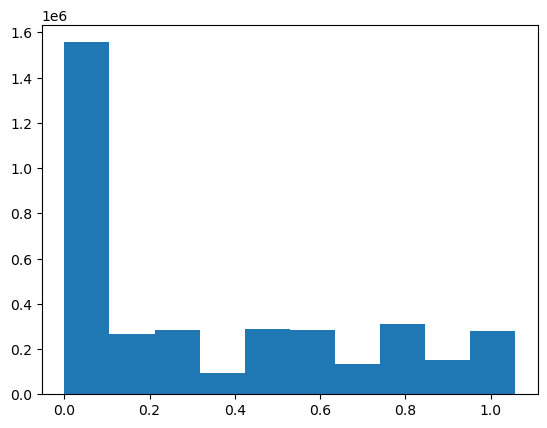

f_69


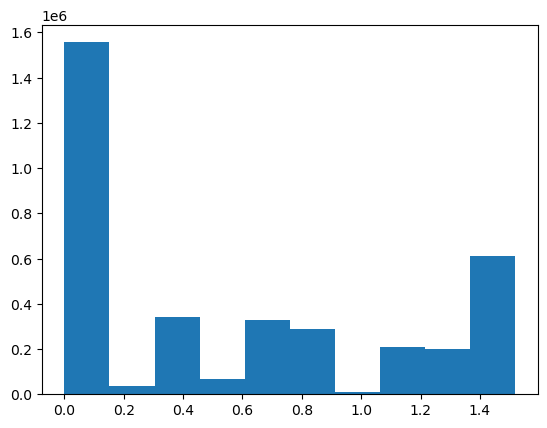

f_70


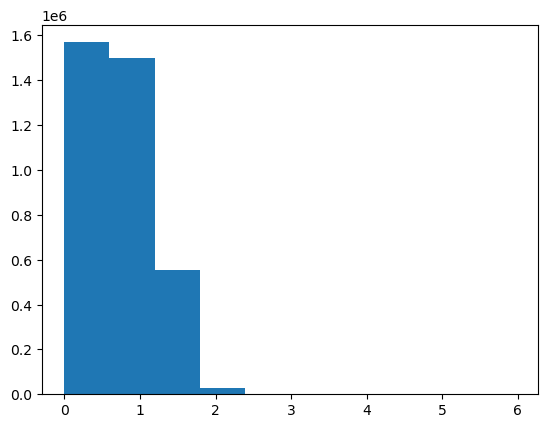

In [11]:
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import numpy as np

for i in flo:
    print(i)
    plt.hist(df_[i], bins=10, align='mid')
    plt.show()
    plt.close()

In [19]:
for i in ['f_42', 'f_43', 'f_51', 'f_58', 'f_64', 'f_65', 'f_66', 'f_68', 'f_69', 'f_70']:
    p = FunctionTransformer(np.log1p)
    df[i] = p.fit_transform(df[i].to_numpy().reshape(-1, 1))
for i in ['f_59', 'f_67']:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

f_42


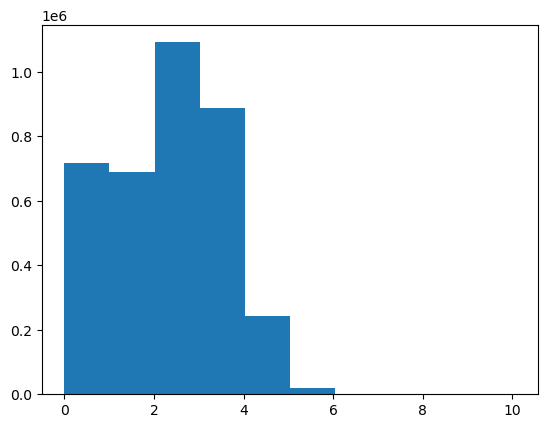

f_43


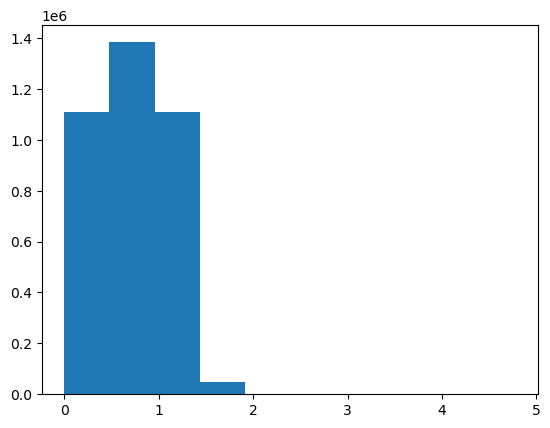

f_51


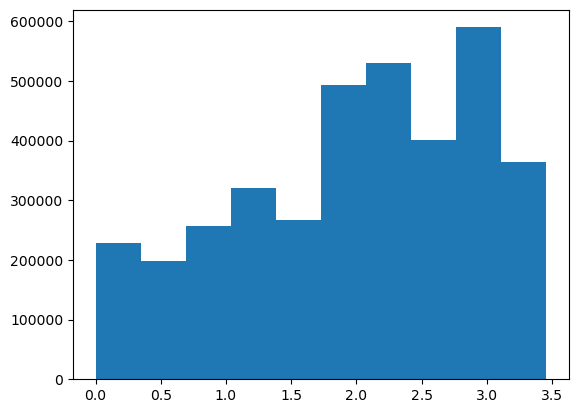

f_58


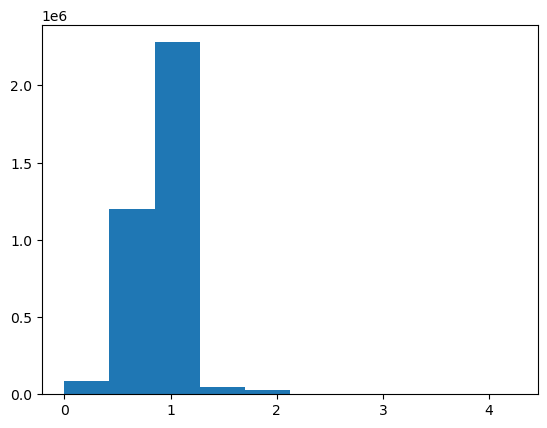

f_59


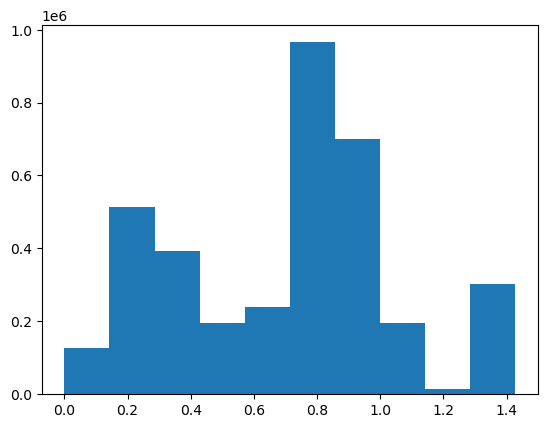

f_64


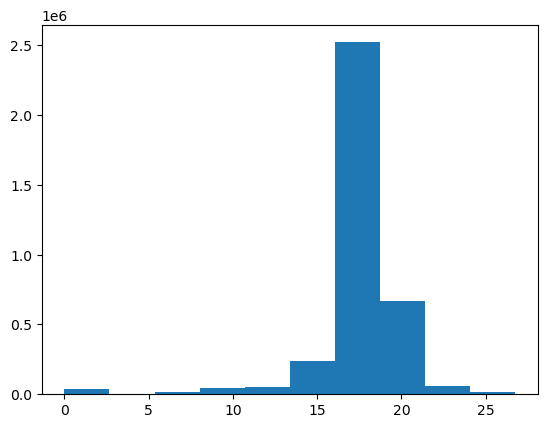

f_65


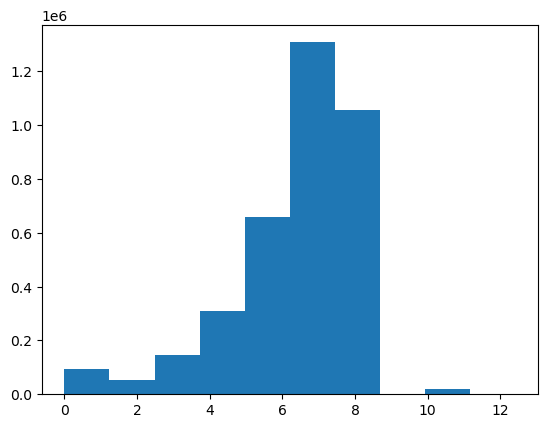

f_66


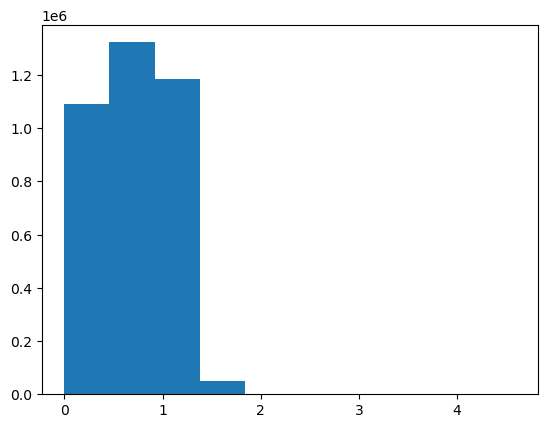

f_67


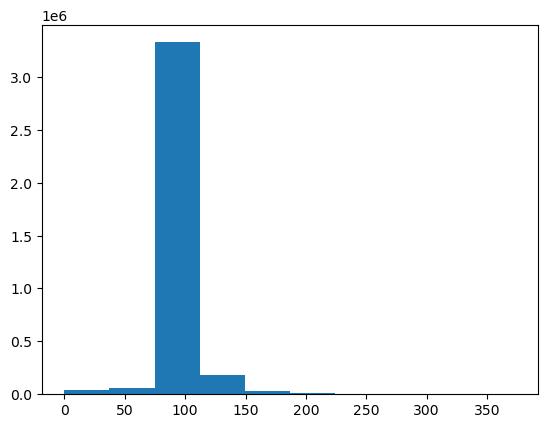

f_68


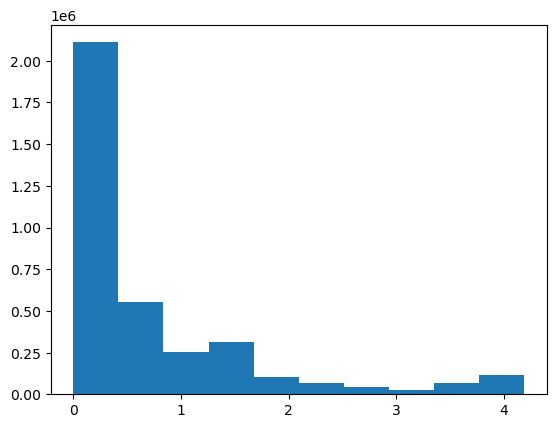

f_69


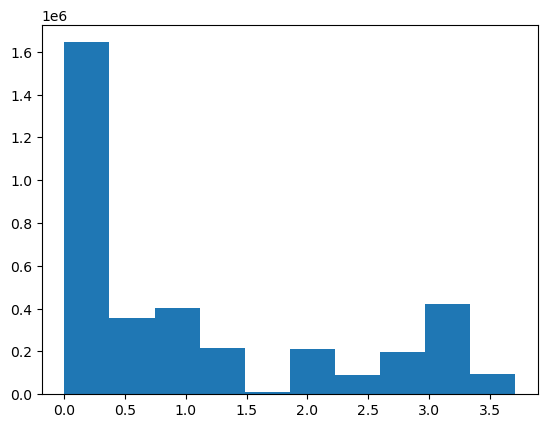

f_70


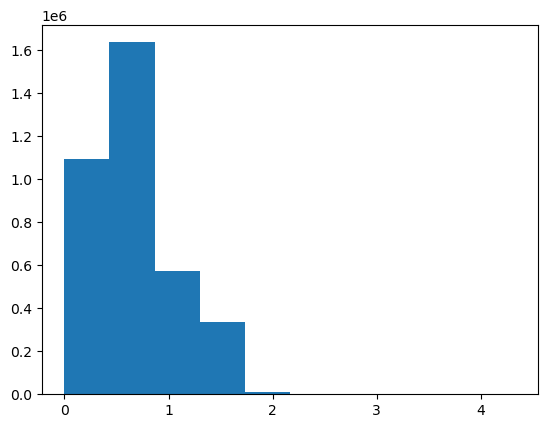

In [20]:
for i in flo:
    print(i)
    plt.hist(df[i], bins=10, align='mid')
    plt.show()
    plt.close()

### 68 try

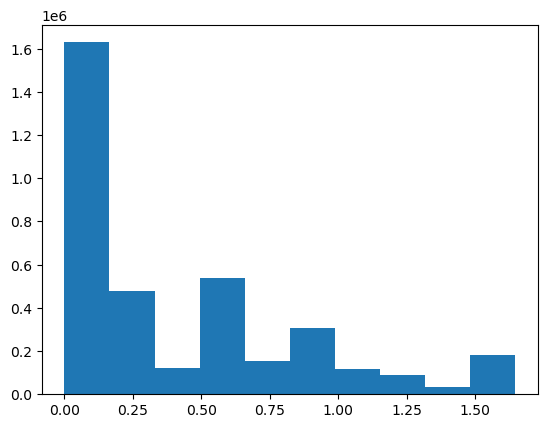

In [21]:
p = FunctionTransformer(np.log1p)
plt.hist(p.fit_transform(df['f_68'].to_numpy().reshape(-1, 1)), bins=10, align='mid')
plt.show()
plt.close()

## save

In [22]:
df.to_csv('/root/autodl-tmp/xingmei/RecSys23/data/all_log1p_except_59_67_boxcox_tvt.csv', sep='\t', index=False)

In [ ]:
cols = list(df.columns)
cols.remove('is_clicked')

In [ ]:
df[cols].to_csv('/root/autodl-tmp/xingmei/RecSys23/data/all_log1p_except_59_67_boxcox_tvt_install.csv', sep='\t', index=False)